In [2]:
import itertools
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
%matplotlib inline

In [3]:
iris = iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["target"] = iris.target
df["target"].replace([0, 1, 2],iris.target_names, inplace=True)

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<AxesSubplot:title={'center':'sepal_width'}>]], dtype=object)

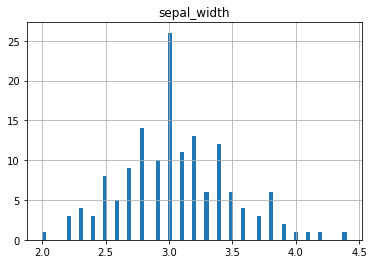

In [16]:
df.hist(column='sepal_width', bins = 75)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [6]:
x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values

In [7]:
y = df['target'].values


In [8]:
x =preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print('train set', x_train.shape, y_train.shape)
print('train set', x_test.shape, y_test.shape)

train set (120, 4) (120,)
train set (30, 4) (30,)


KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [11]:
k = 4

knn = KNC(n_neighbors=k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [12]:
yhat = knn.predict(x_test)
yhat[0:10]

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [13]:
from sklearn import metrics
print("Train Accuracy : ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Train Accuracy : ", metrics.accuracy_score(y_test, knn.predict(x_test)))

Train Accuracy :  0.9666666666666667
Train Accuracy :  0.9333333333333333


## Mencari nilai K terbaik

In [14]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confussionMx = [];

for n in range(1, Ks):
  neighbor = KNC(n_neighbors = n).fit(x_train,y_train)
  yhat = neighbor.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333])

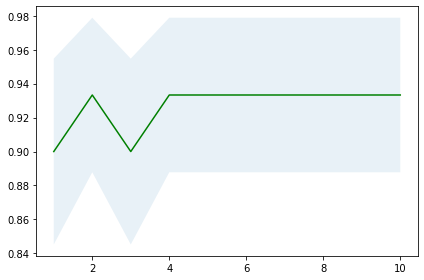

In [15]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc, mean_acc+1*std_acc, alpha =  0.10)
plt.tight_layout()
plt.show()